/tmp/ipykernel_235591/3165006574.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1.dropna(how='any', inplace=True)
/tmp/ipykernel_235591/3165006574.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sal_data1['Degree_Encode'] = label_encoder.fit_transform(sal_data1['Degree'])
/tmp/ipykernel_235591/3165006574.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

R^2: 0.7242647072071071
Mean Absolute Error: 21632.53528665098
Accuracy of the model: 72.43%


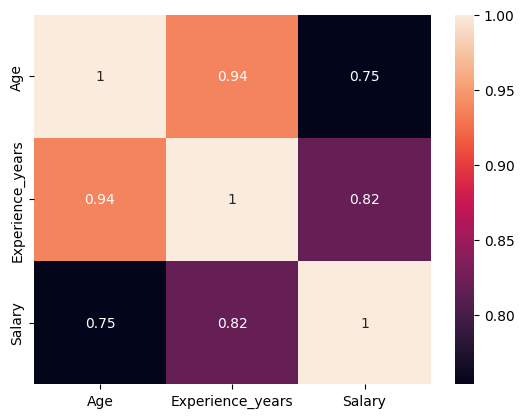

In [18]:
# Import necessary packages
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the salary data from CSV file
sal_data = pd.read_csv('Salary.csv')

# Rename the columns for better readability
sal_data.columns = ['Age','Gender','Degree','Job_Title','Experience_years','Salary','Country']

# Remove duplicate rows
sal_data1 = sal_data.drop_duplicates(keep='first')

# Remove rows with missing values
sal_data1.dropna(how='any', inplace=True)

# Generate descriptive statistics of the data
sal_data1.describe()

# Calculate the correlation matrix
corr = sal_data1[['Age','Experience_years','Salary']].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True)

# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
sal_data1['Degree_Encode'] = label_encoder.fit_transform(sal_data1['Degree'])
sal_data1['Job_Title_Encode'] = label_encoder1.fit_transform(sal_data1['Job_Title'])
sal_data1['Country_Encode'] = label_encoder2.fit_transform(sal_data1['Country']) 


# Scale numerical variables using StandardScaler
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
sal_data1['Age_scaled'] = std_scaler.fit_transform(sal_data1['Age'].values.reshape(-1,1))
sal_data1['Experience_years_scaled'] = std_scaler.fit_transform(sal_data1['Experience_years'].values.reshape(-1,1))

# Prepare the feature matrix X and the target variable y
X = sal_data1[['Age_scaled','Experience_years_scaled','Degree_Encode','Job_Title_Encode','Country_Encode']]
y = sal_data1['Salary']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
from sklearn.linear_model import LinearRegression
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = linear_regression_model.predict(X_test)

# Create a dataframe to compare the actual and predicted values
df = pd.DataFrame({'y_Actual': y_test, 'y_Predicted': y_pred_lr})

# Calculate the error and absolute error
df['Error'] = df['y_Actual'] - df['y_Predicted']
df['abs_error'] = abs(df['Error'])

# Calculate the mean absolute error
mean_absolute_error = df['abs_error'].mean()

# Calculate the R-squared score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_lr)

# Save the trained model and other objects
joblib.dump(linear_regression_model, 'linear_regression_model.pkl')

joblib.dump(label_encoder1, 'job_title_encoder.pkl')
joblib.dump(std_scaler, 'age_scaler.pkl')
joblib.dump(std_scaler, 'experience_scaler.pkl')
joblib.dump(label_encoder2, 'Country_encoder.pkl')
joblib.dump(label_encoder, 'degree_encoder.pkl')
# Print evaluation metrics
print(f"R^2: {r2}")
print(f"Mean Absolute Error: {mean_absolute_error}")
print(f"Accuracy of the model: {round(r2*100, 2)}%")

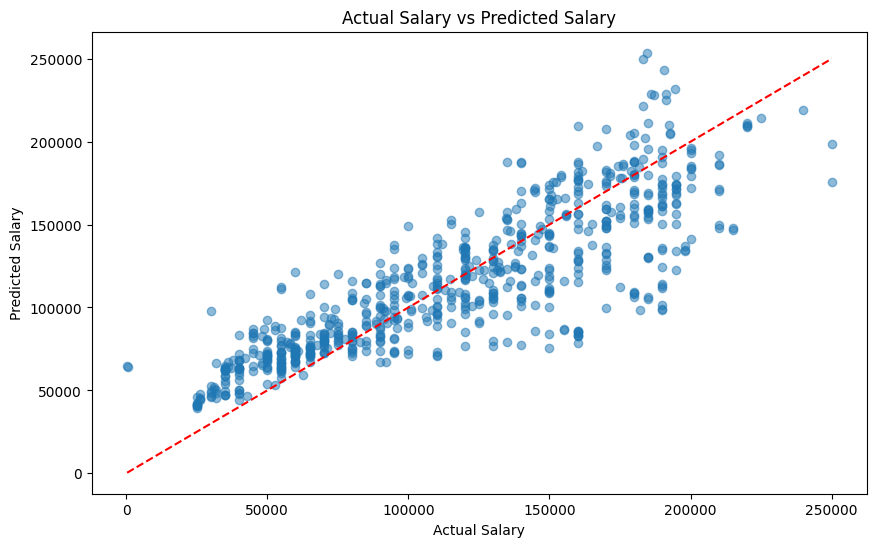

In [13]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['y_Actual'], df['y_Predicted'], alpha=0.5)
plt.plot([df['y_Actual'].min(), df['y_Actual'].max()], [df['y_Actual'].min(), df['y_Actual'].max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual Salary vs Predicted Salary')
plt.show()

In [10]:
sal_data1

,Age,Gender,Degree,Job_Title,Experience_years,Salary,Country,Degree_Encode,Job_Title_Encode,Country_Encode,Age_scaled,Experience_years_scaled
0,32,Male,1,Software Engineer,5.0,90000,UK,1,112,3,-0.309226,-0.563675
1,28,Female,2,Data Analyst,3.0,65000,USA,2,24,4,-0.811539,-0.871556
2,45,Male,3,Manager,15.0,150000,Canada,3,72,1,1.323290,0.975731
3,36,Female,1,Sales Associate,7.0,60000,USA,1,100,4,0.193087,-0.255793
4,52,Male,2,Director,20.0,200000,USA,2,34,4,2.202337,1.745434
...,...,...,...,...,...,...,...,...,...,...,...,...
6675,33,Female,1,Content Marketing Manager,7.0,90000,Australia,1,15,0,-0.183648,-0.255793
6678,37,Male,1,Sales Representative,6.0,75000,Canada,1,105,1,0.318665,-0.409734
6679,49,Female,3,Director of Marketing,20.0,200000,UK,3,42,3,1.825603,1.745434
6680,32,Male,0,Sales Associate,3.0,50000,Australia,0,100,0,-0.309226,-0.871556
